# Install libraries

In [1]:
# !pip install scikit-fuzzy
# !pip install matplotlib

# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
%matplotlib inline

# Simulate height & weight readings from sensor

In [3]:
height = round(np.random.random()*100, 2)
weight = round(np.random.random()*10, 2)
print('The height is:', height, 'cm')
print('The weight is:', weight, 'kg')

The height is: 75.78 cm
The weight is: 3.21 kg


### Course example:

In [4]:
height = 65   # CM - Slide example
weight = 3.6  # KG - Slide example
print('The height is:', height, 'cm')
print('The weight is:', weight, 'kg')

The height is: 65 cm
The weight is: 3.6 kg


# Define membership functions

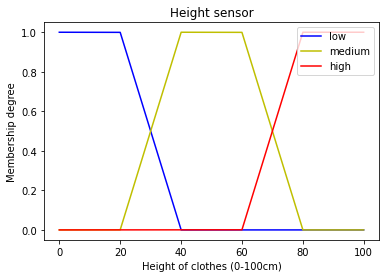

In [5]:
# height
h_x = np.arange(0, 100, 0.0001)
mfx_h = []
mfx_h.append(fuzz.trapmf(h_x, [0, 0, 20, 40])) # Low
mfx_h.append(fuzz.trapmf(h_x, [20, 40, 60, 80])) # Medium
mfx_h.append(fuzz.trapmf(h_x, [60, 80, 100, 100])) # High

plt.figure()
plt.plot(h_x, mfx_h[0], 'b') # Low
plt.plot(h_x, mfx_h[1], 'y') # Medium
plt.plot(h_x, mfx_h[2], 'r') # High
plt.title('Height sensor')
plt.legend(['low', 'medium', 'high'], loc='upper right')
plt.xlabel('Height of clothes (0-100cm)')
plt.ylabel('Membership degree')
plt.show()

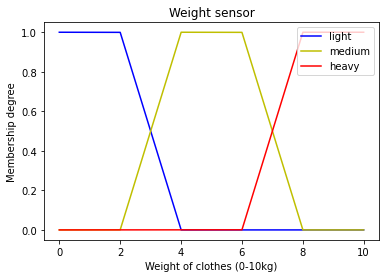

In [6]:
# weight
w_x = np.arange(0, 10, 0.0001)
mfx_w = []
mfx_w.append(fuzz.trapmf(w_x, [0, 0, 2, 4])) # Light
mfx_w.append(fuzz.trapmf(w_x, [2, 4, 6, 8])) # Medium
mfx_w.append(fuzz.trapmf(w_x, [6, 8, 10, 10])) # Heavy

plt.figure()
plt.plot(w_x, mfx_w[0], 'b') # Light
plt.plot(w_x, mfx_w[1], 'y') # Medium
plt.plot(w_x, mfx_w[2], 'r') # Heavy
plt.title('Weight sensor')
plt.legend(['light', 'medium', 'heavy'], loc='upper right')
plt.xlabel('Weight of clothes (0-10kg)')
plt.ylabel('Membership degree')
plt.show()

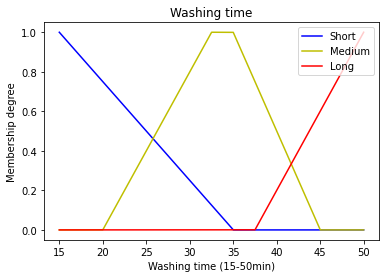

In [7]:
# washing time
t_x = np.arange(15, 50, 0.0001)

mfx_t = []
mfx_t.append(fuzz.trimf(t_x, [15, 15, 35])) # Short
mfx_t.append(fuzz.trapmf(t_x, [20, 32.5, 35, 45])) # Medium
mfx_t.append(fuzz.trimf(t_x, [37.5, 50, 50])) # Long

plt.figure()
plt.plot(t_x, mfx_t[0], 'b')
plt.plot(t_x, mfx_t[1], 'y')
plt.plot(t_x, mfx_t[2], 'r')
plt.title('Washing time')
plt.legend(['Short', 'Medium', 'Long'], loc='upper right')
plt.xlabel('Washing time (15-50min)')
plt.ylabel('Membership degree')
plt.show()

# [ Fuzzification ]

In [8]:
# Fuzzify height
h_fuzzy = []
h_fuzzy.append(fuzz.interp_membership(h_x, mfx_h[0], height)) # Low
h_fuzzy.append(fuzz.interp_membership(h_x, mfx_h[1], height)) # Medium
h_fuzzy.append(fuzz.interp_membership(h_x, mfx_h[2], height)) # High

print('Fuzzified Height \n Low    : %0.2f \n Medium : %0.2f \n High   : %0.2f' 
      % (h_fuzzy[0], h_fuzzy[1], h_fuzzy[2]))

Fuzzified Height 
 Low    : 0.00 
 Medium : 0.75 
 High   : 0.25


In [9]:
# Fuzzify weight
w_fuzzy = []
w_fuzzy.append(fuzz.interp_membership(w_x, mfx_w[0], weight)) # Light
w_fuzzy.append(fuzz.interp_membership(w_x, mfx_w[1], weight)) # Medium
w_fuzzy.append(fuzz.interp_membership(w_x, mfx_w[2], weight)) # Heavy

print('Fuzzified Weight \n Light  : %0.2f \n Medium : %0.2f \n Heavy  : %0.2f' 
      % (w_fuzzy[0], w_fuzzy[1], w_fuzzy[2]))

Fuzzified Weight 
 Light  : 0.20 
 Medium : 0.80 
 Heavy  : 0.00


# Fuzzy rule sets (decision table)

In [10]:
#                                             <Rule Table>
#                                        ========Weight=======
#                                        Light,  Medium, Heavy
rule_table = [  #                        =====================
    [0, 0, 1],  #   ====== || Low    ||  Short,  Short,  Medium
    [0, 1, 2],  #   Height || Medium ||  Short,  Medium, Long
    [1, 2, 2]]  #   ====== || High   ||  Medium, Long,   Long


# [ Inference ] Min() of Min-Max Compositon

In [11]:
rule_fuzzy = np.zeros((3,3))

# Activate the rule <AND> operation
for i, h_fuz in enumerate(h_fuzzy):
    for j, w_fuz in enumerate(w_fuzzy):
        rule_fuzzy[i, j] = min(h_fuz, w_fuz) # Min() of Min-Max Compositon

rule_fuzzy

array([[0.  , 0.  , 0.  ],
       [0.2 , 0.75, 0.  ],
       [0.2 , 0.25, 0.  ]])

# [ Inference ] Max() of Min-Max Compositon

In [12]:
t_fuzzy = [0, 0, 0] # t_fuzzy[0] for Short     t_fuzzy[1] for Medium     t_fuzzy[2] for Long

for i in range(rule_fuzzy.shape[0]):
    for j in range(rule_fuzzy.shape[1]):
        t_fuzzy[rule_table[i][j]] = max(t_fuzzy[rule_table[i][j]], rule_fuzzy[i][j]) # Max() of Min-Max Compositon
        
print('Washing time composition \n Short  : %0.2f \n Medium : %0.2f \n Long   : %0.2f' 
      % (t_fuzzy[0], t_fuzzy[1], t_fuzzy[2]))

Washing time composition 
 Short  : 0.20 
 Medium : 0.75 
 Long   : 0.25


# [ Defuzzification ]

In [13]:
def defuzzification_plot(strategy):
    t_shape = [] # Temp varibale to calculate the contour

    for i in range(3):
        t_shape.append(np.fmin(t_fuzzy[i], mfx_t[i])) 

    t_contour = np.fmax(t_shape[0], np.fmax(t_shape[1], t_shape[2])) # <OR> operation to get the contour
    
    if(strategy=='com'):
        x = np.where(t_contour == t_contour[0])
        c1 = x[0][-1]
        mean1 = (t_x[0]+t_x[c1])/2

        x = np.where(t_contour == max(t_contour))
        c2 = x[0][0]
        c3 = x[0][-1]
        mean2 = (t_x[c2]+t_x[c3])/2

        x = np.where(t_contour == t_contour[-1])
        c4 = x[0][0]
        mean3 = (t_x[c4]+t_x[-1])/2

        t = (mean1+mean2+mean3)/3
        
    else:
        t = fuzz.defuzz(t_x, t_contour, strategy)
    
    plt.figure()
    plt.plot(t_x, mfx_t[0], 'b--')
    plt.plot(t_x, mfx_t[1], 'y--')
    plt.plot(t_x, mfx_t[2], 'r--')
    plt.plot(t_x, t_contour, 'k-') # Get the contour of washing time after defuzzification and apply "MOM"
    plt.vlines(t, 0, max(t_contour), color='grey')  # Defuzzification line
    plt.title('Defuzzification')
    plt.xlabel('Washing time (15 - 50 minutes)')
    plt.ylabel('Membership degree (0 - 100%)')
    plt.legend(['fuzzy set: Short', 'fuzzy set: Medium', 'fuzzy set: Long', 
                'composition result', 'defuzzification result'], loc='upper right')
    plt.show()

    print('The derived washing time is: %.4f minutes.' % t)

com


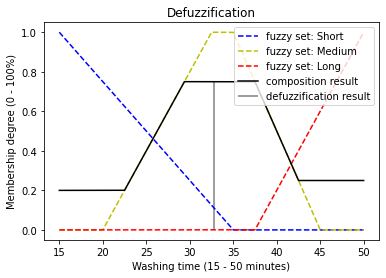

The derived washing time is: 32.8125 minutes.
****************************************************************************************************
centroid


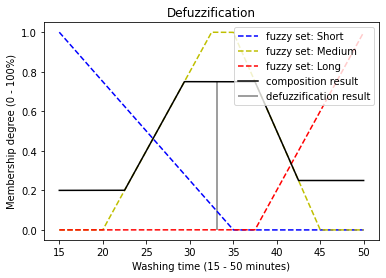

The derived washing time is: 33.1113 minutes.
****************************************************************************************************
bisector


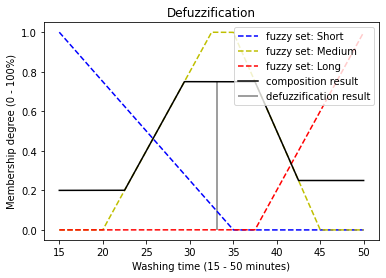

The derived washing time is: 33.1771 minutes.
****************************************************************************************************
mom


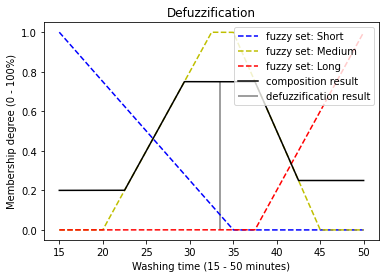

The derived washing time is: 33.4375 minutes.
****************************************************************************************************
som


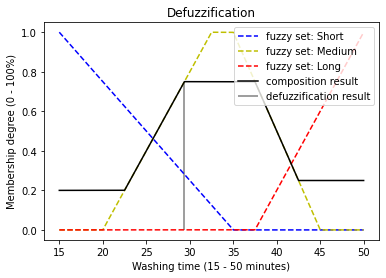

The derived washing time is: 29.3751 minutes.
****************************************************************************************************
lom


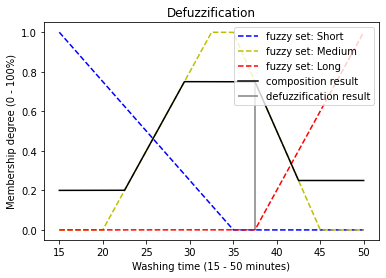

The derived washing time is: 37.5000 minutes.
****************************************************************************************************


In [15]:
for strategy in ['com','centroid','bisector','mom','som','lom']:
    print(strategy)
    defuzzification_plot(strategy)
    print('*'*100)